In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

### this script can be used to calculate the stellar mass using the approach described by Zibetti et al. 2009

In [2]:
# Units and definitions
Lsun = 3.846e26 # Solar luminosity in Watt

### Determine g and i band images

In [4]:
images = os.listdir("./SAMPLE/")
gimages = [image for image in images if image.endswith("g.csv")]
iimages = [image for image in images if image.endswith("i.csv")]
ids = [image.split("-")[0] for image in gimages]

In [5]:
print("G list size:  ",len(gimages))
print("I list size:  ",len(iimages))
print("ids list size: ",len(ids))

G list size:   53
I list size:   53
ids list size:  53


In [7]:
print(gimages[0])
print(iimages[0])
print(ids[0])

1237645879578460255-g.csv
1237645879578460255-i.csv
1237645879578460255


### Read in stellar masses and distance

In [8]:
df_mass = pd.read_csv(os.path.abspath("./sample.csv"), sep=';')
df_mass['SDSS_ID'] = df_mass['SDSS_ID'].apply(str)

## Plotting a frame 
### # Read in as pandas dataframe

In [9]:
df_image = pd.read_csv(os.path.abspath("./SAMPLE/" + gimages[15]), sep=',')

In [14]:
df_image.head()

,-0.00756256,-0.00157442,-0.0106891,-0.00121172,0.0274976,0.0346938,-0.0109701,-0.00579422,0.000328268,-0.0193955,...,0.00849693,0.00495795,-0.0259838,0.00590291,-0.0208995,-0.0315329,0.021343,-0.0144113,-0.00895312,0.0173727
0,0.011577,-0.001051,-0.019319,0.011783,-0.014329,0.015715,-0.013074,-0.010033,0.017412,-0.011142,...,0.014679,0.006247,0.004399,0.005013,0.002695,0.012223,-0.003231,0.008459,-0.002561,0.008790
1,0.000852,0.004988,0.001199,-0.010293,0.005989,0.016406,0.024140,-0.015113,0.003650,0.006260,...,0.031415,-0.011776,-0.008311,0.027578,0.020750,0.030325,0.006890,-0.003599,0.023103,0.010136
2,-0.010729,0.009392,-0.002641,-0.009390,0.029164,-0.029773,0.004768,-0.005992,-0.008987,-0.002560,...,-0.000929,-0.002691,-0.027494,-0.003677,0.013162,-0.002232,0.027858,0.002723,0.002223,0.017934
3,0.005873,-0.001155,-0.008325,0.001046,0.008330,-0.008931,0.015206,0.015038,-0.008589,0.013469,...,0.007514,-0.035982,-0.011946,0.006340,-0.014828,0.009141,0.034919,0.002794,-0.013775,0.008887
4,-0.003019,0.005306,-0.022113,-0.006413,0.019269,0.007640,0.019228,0.007188,-0.004864,-0.006940,...,-0.003903,-0.003598,-0.002391,-0.012741,-0.035759,0.013519,-0.000828,0.023476,-0.001383,-0.002614


### # Plot an image with a certain scale

plotting image :  1237645943978983683-i.csv


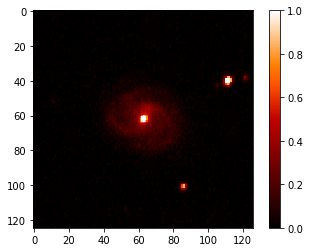

In [10]:
print("plotting image : ", images[15])
plt_data = [[float(y) for y in x] for x in df_image.as_matrix()] # convert to matrix
plt.imshow(plt_data, cmap='gist_heat')
plt.colorbar()
plt.clim(0,1) # set Zscale
plt.show()

### Determine stellar mass 

In [15]:
gi_masses = []
true_masses = []
errors = []

for ID in ids:

    df_g_image = pd.read_csv(os.path.abspath("./SAMPLE/" + ID + "-g.csv"), sep=',')
    df_i_image = pd.read_csv(os.path.abspath("./SAMPLE/" + ID + "-i.csv"), sep=',')

    flux_g = df_g_image.values.sum()  #add all values in the dataframe
    flux_i = df_i_image.values.sum()

    col_gi = -2.5*np.log10(flux_g/flux_i) # calculate the color difference
    logML_g  = -1.197 + 1.431 * col_gi # calculate the mass-to-light ratio
    ML_g     = 10**logML_g

    flux_g_Jy = flux_g * 3.631e-6 # nanomaggies to jansky
    dist = df_mass[df_mass['SDSS_ID'] == ID]['Distance']
    D = dist * 3.086e22 # Megaparsec to meter

    Lg = flux_g_Jy * 1.e-26 * 4.*np.pi*D**2 * 3.e8 / (0.469*1.e-6) / Lsun # flux to solar luminosity

    Mg = ML_g*Lg # Stellar mass in solar masses

    gi_masses.append(float(np.log10(Mg))) # log10 of stellar mass
    true_masses.append(float(df_mass[df_mass['SDSS_ID'] == ID]['logMstar']))
    errors.append(float(df_mass[df_mass['SDSS_ID'] == ID]['err_logMstar']))

In [18]:
print(len(gi_masses))

53


In [38]:
for i in np.arange(len(gi_masses)):
    print("{} - Gi masse: {:.4}   True masse: {:.4}   Error: {:.4}".format(i, gi_masses[i], true_masses[i], errors[i] ))

0 - Gi masse: 11.67   True masse: 11.1   Error: 0.029
1 - Gi masse: 12.59   True masse: 10.54   Error: 0.032
2 - Gi masse: 12.23   True masse: 11.32   Error: 0.015
3 - Gi masse: 11.06   True masse: 10.86   Error: 0.026
4 - Gi masse: 9.278   True masse: 9.485   Error: 0.042
5 - Gi masse: 10.42   True masse: 10.76   Error: 0.029
6 - Gi masse: 11.18   True masse: 10.17   Error: 0.024
7 - Gi masse: 11.65   True masse: 11.79   Error: 0.017
8 - Gi masse: 10.68   True masse: 10.93   Error: 0.044
9 - Gi masse: 10.81   True masse: 10.82   Error: 0.012
10 - Gi masse: 11.24   True masse: 10.09   Error: 0.04
11 - Gi masse: 10.48   True masse: 10.46   Error: 0.033
12 - Gi masse: 10.92   True masse: 11.24   Error: 0.014
13 - Gi masse: 9.209   True masse: 9.585   Error: 0.058
14 - Gi masse: 10.43   True masse: 10.74   Error: 0.031
15 - Gi masse: 10.99   True masse: 10.68   Error: 0.029
16 - Gi masse: 10.02   True masse: 10.31   Error: 0.032
17 - Gi masse: 10.88   True masse: 11.09   Error: 0.011
18 -

In [40]:
df_comparison = pd.DataFrame({"CalcMass": gi_masses,
                              "TrueMass": true_masses,
                              "Error": errors})


In [44]:
df_comparison.head()

,CalcMass,Error,TrueMass
0,11.671942,0.029,11.101
1,12.588725,0.032,10.539
2,12.233188,0.015,11.318
3,11.057099,0.026,10.862
4,9.277894,0.042,9.485


In [45]:
print(df_comparison.dtypes)

CalcMass    float64
Error       float64
TrueMass    float64
dtype: object


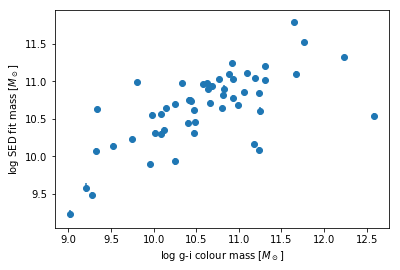

In [42]:
plt.errorbar(df_comparison['CalcMass'], df_comparison['TrueMass'], yerr=df_comparison['Error'], fmt='o')
plt.xlabel('log g-i colour mass $[M_\odot]$')
plt.ylabel('log SED fit mass $[M_\odot]$')
plt.show()